In [1]:
import pandas as pd
import os

import nba_utils

# Read shot chart data

### Downloaded shot charts from NBA savant, top 10 players by shot attempt from 2011-2012 --> 2015-2016 season

In [128]:
# def read_csv_dir(dirname):
#     dfs = []
#     for f in os.listdir(dirname):
#         df = pd.read_csv(os.path.join(dirname,f))
#         dfs.append(df)
#     return pd.concat(dfs)

# _dfs = []
# for yr in range(2011,(2016+1)):
#     dirname = 'data/shot_charts_top_10/{yr}'.format(yr = yr)
#     df = read_csv_dir(dirname)
#     df.insert(0, 'yr', yr)
#     _dfs.append(df)
# shot_df = pd.concat(_dfs, ignore_index = True)
# shot_df.to_csv('data/shot_charts_top_10/top_10_shot_charts_2011_2016.csv')

In [129]:
shot_df = pd.read_csv('data/shot_charts_top_10/top_10_shot_charts_2011_2016.csv')

In [190]:
shot_df.yr.value_counts()

2011    15029
2014    14326
2016    13983
2013    13941
2015    13394
2012    11399
Name: yr, dtype: int64

# Re-create James Harden shot chart

In [130]:
df = shot_df.query('name == "James Harden" and yr == 2015')
df.y.max()

463

In [149]:
list(df[df.y == df.y.max()])

['Unnamed: 0',
 'yr',
 'name',
 'team_name',
 'game_date',
 'season',
 'espn_player_id',
 'team_id',
 'espn_game_id',
 'period',
 'minutes_remaining',
 'seconds_remaining',
 'shot_made_flag',
 'action_type',
 'shot_type',
 'shot_distance',
 'opponent',
 'x',
 'y',
 'dribbles',
 'touch_time',
 'defender_name',
 'defender_distance',
 'shot_clock']

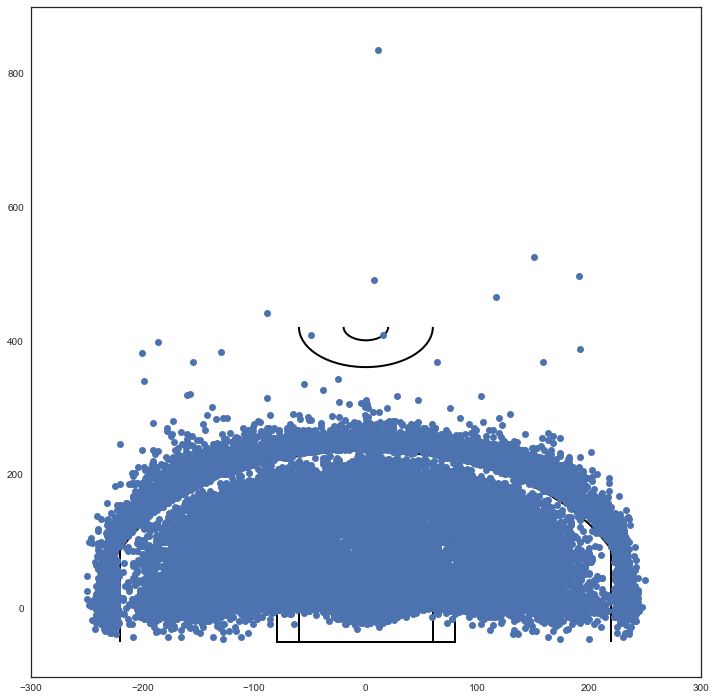

In [150]:
df = shot_df.query('shot_made_flag == 1')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df.x, df.y, 'bo')
nba_utils.draw_court(ax)

In [155]:
df.sort_values('x', ascending=True).x

48366   -250
47968   -250
71263   -250
80000   -248
77828   -248
22314   -246
16535   -246
62973   -246
50797   -245
74324   -245
81392   -245
81603   -245
39941   -243
45696   -243
72465   -243
80068   -243
78249   -243
24628   -242
39854   -242
39276   -242
66088   -242
11470   -242
67668   -242
60756   -242
28140   -242
33771   -242
45207   -242
35190   -242
33004   -242
28462   -242
        ... 
69771    240
39832    241
49310    241
76920    241
50925    241
22474    241
3814     241
10189    241
49789    241
14381    241
50964    242
59502    242
66144    242
1407     242
46716    242
39463    242
52028    242
28000    242
60731    242
81323    243
14866    244
62085    244
62411    244
65803    244
1434     244
75889    245
14105    245
75768    245
46631    247
11464    250
Name: x, dtype: int64

In [196]:
sns.set_style("white")
sns.set_color_codes()

def plot_shot_chart(df, gridsize = 15):
    cmap=plt.cm.gist_heat_r
    joint_shot_chart = sns.jointplot(df.x, df.y, stat_func=None,
                                     kind='hex', space=0, color=cmap(.2), 
                                     cmap=cmap, size = 20, joint_kws=dict(gridsize=gridsize))
    joint_shot_chart.fig.set_size_inches(12,11)
    # A joint plot has 3 Axes, the first one called ax_joint 
    # is the one we want to draw our court onto 
    ax = joint_shot_chart.ax_joint
    nba_utils.draw_court(ax)

    # Adjust the axis limits and orientation of the plot in order
    # to plot half court, with the hoop by the top of the plot
    ax.set_xlim(-250,250)
    ax.set_ylim(422.5, -47.5)

    # Get rid of axis labels and tick marks
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom='off', labelleft='off')

    # add data source
    # Add Data Source and Author
    ax.text(-250,445,'Data Source: stats.nba.com', fontsize=12)

In [194]:
shot_df.yr.value_counts()

2011    15029
2014    14326
2016    13983
2013    13941
2015    13394
2012    11399
Name: yr, dtype: int64

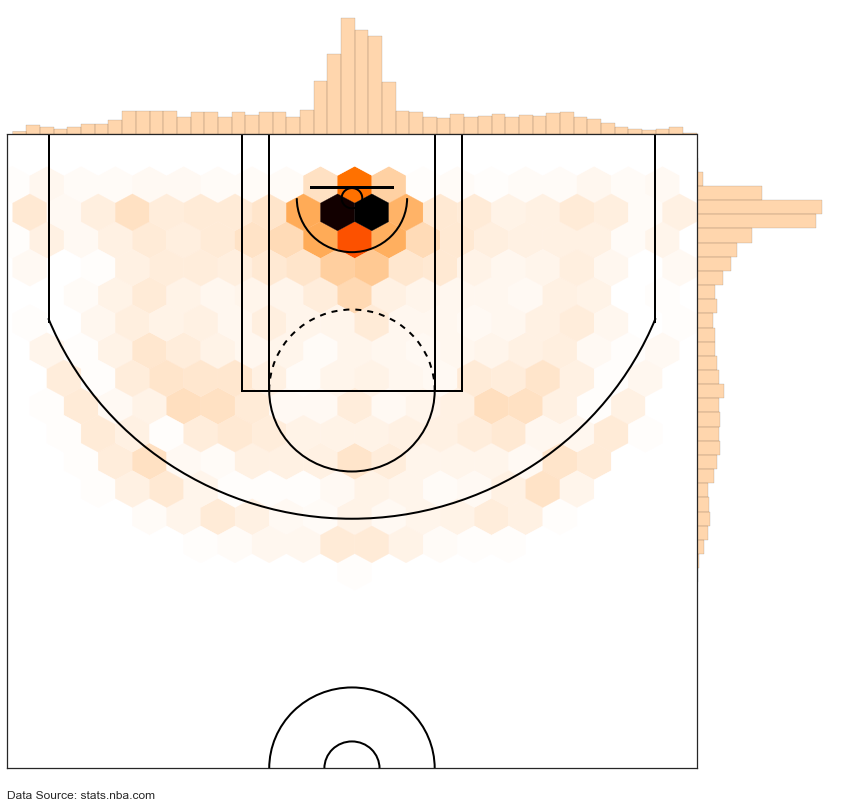

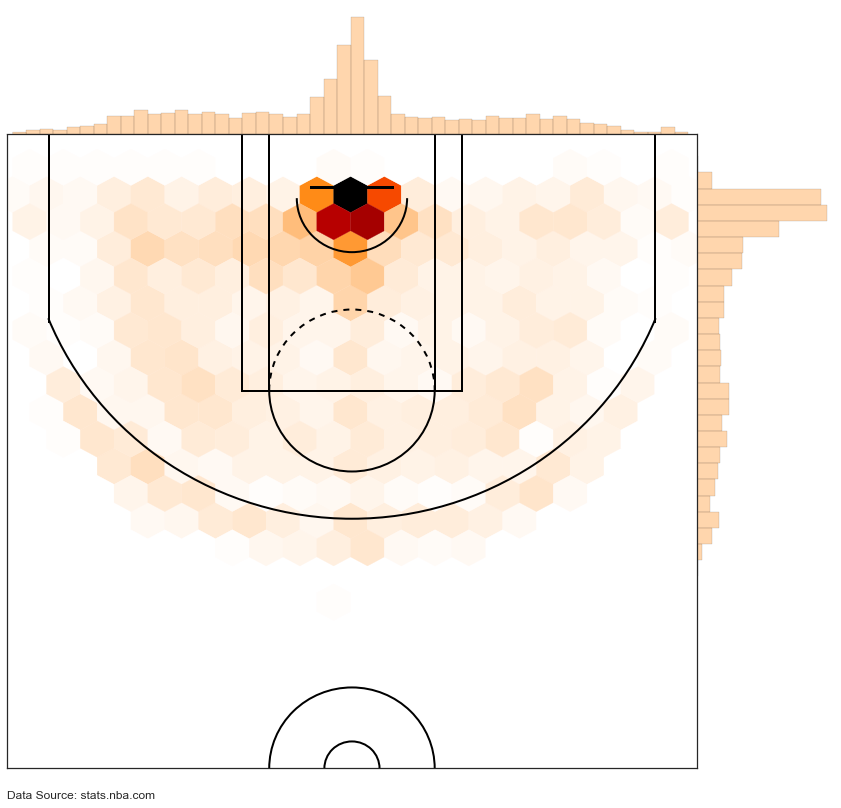

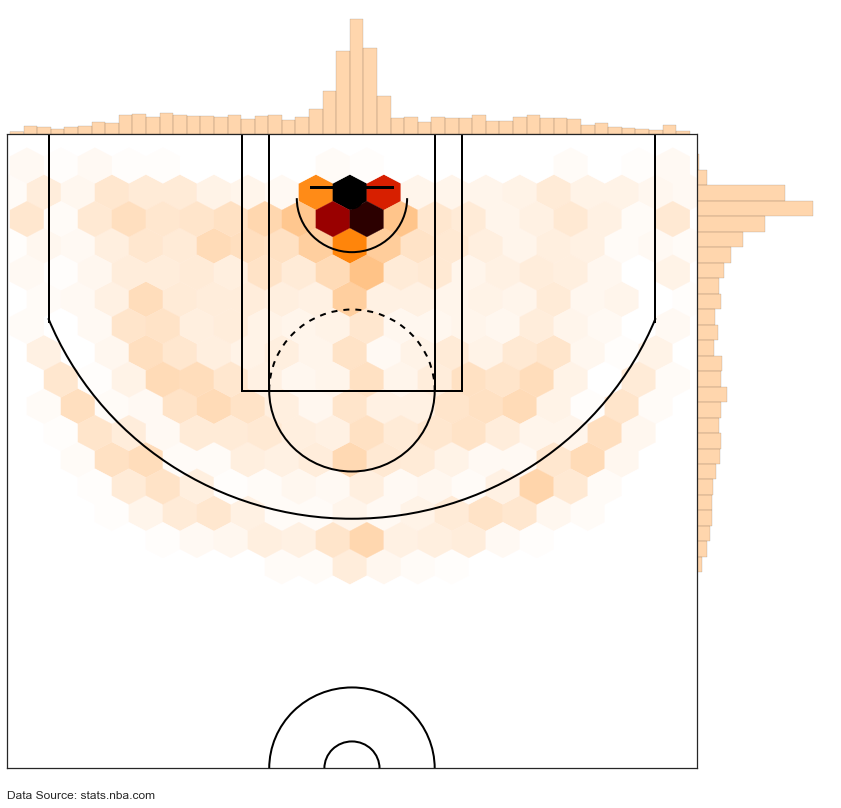

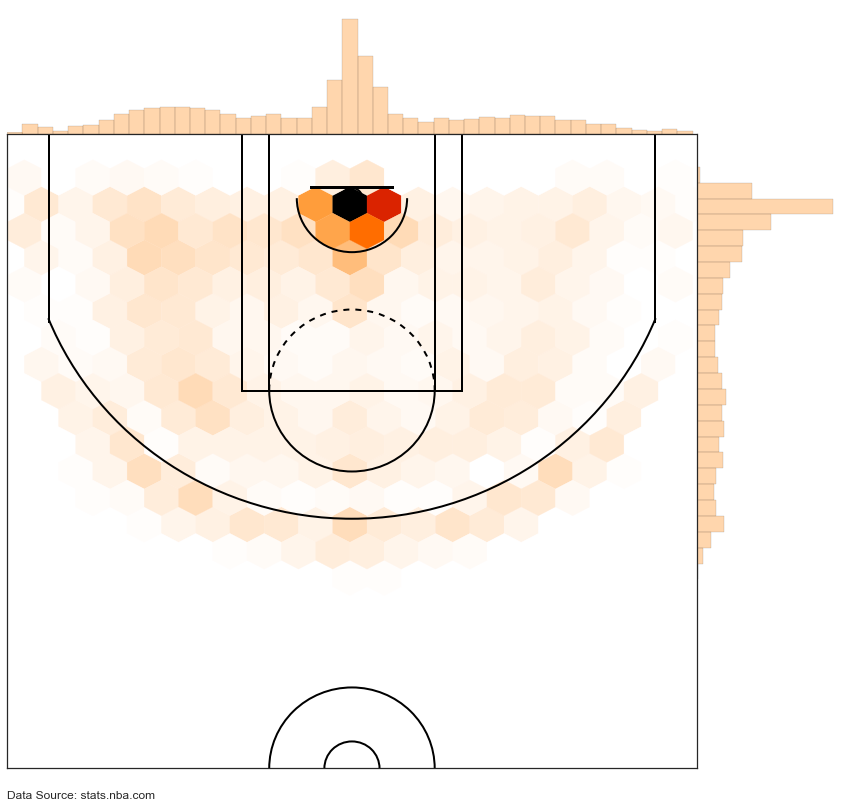

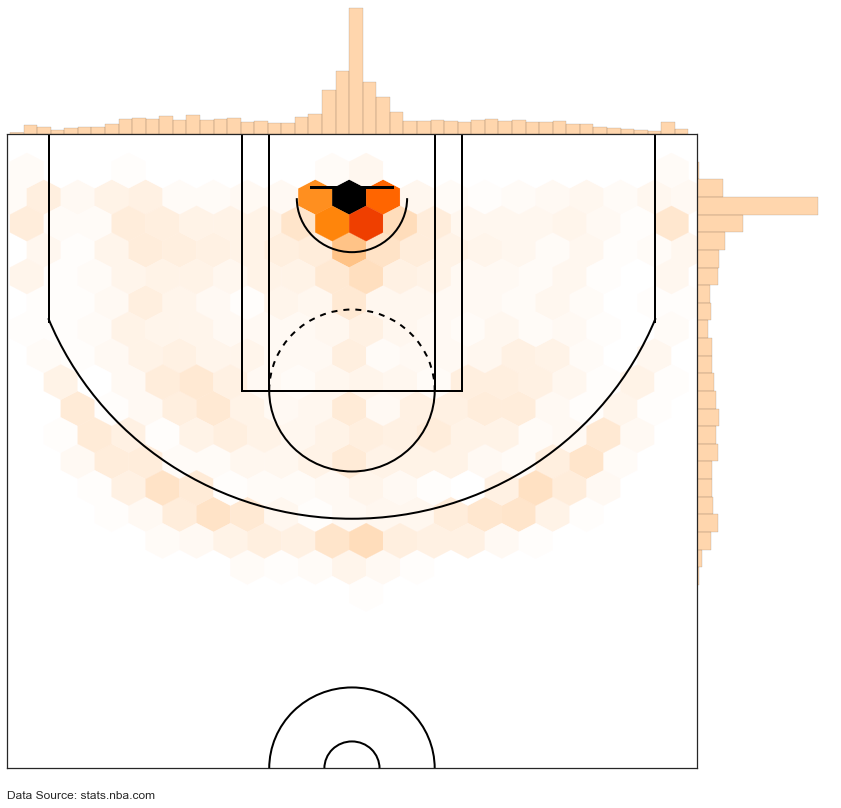

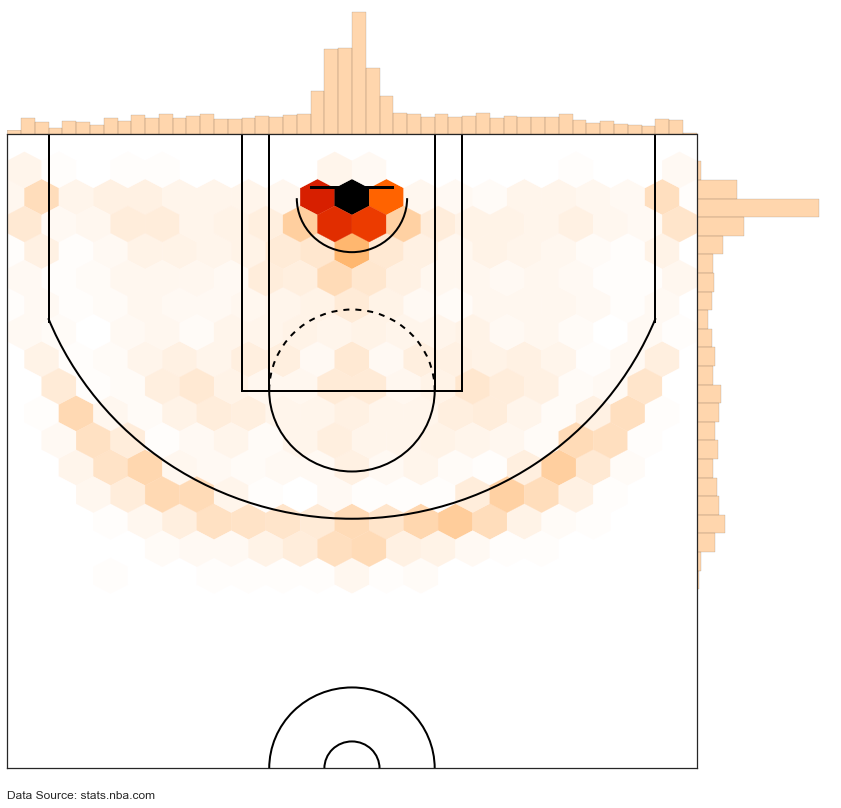

In [200]:
for yr in range(2011,2016+1):
    df = shot_df.query('y <= 400 and abs(x) <= 250 and yr == {}'.format(yr))
    plot_shot_chart(df, gridsize = 20)
    plt.savefig('results/{}.png'.format(yr))

# Determine if shot is a 3 pointer

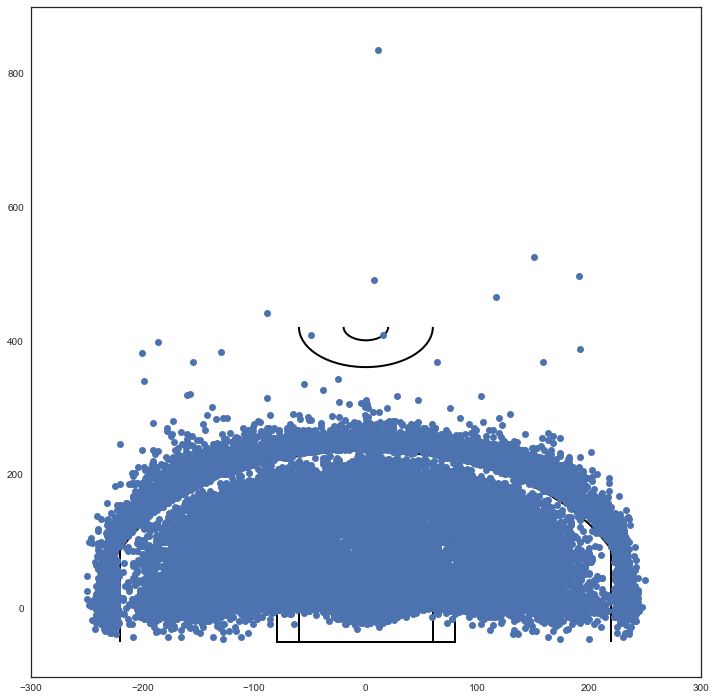

In [303]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    '''Draws NBA court on axis. 
    Source: http://savvastjortjoglou.com/nba-shot-sharts.html'''
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax
    
    
    
df = shot_df.query('shot_made_flag == 1')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df.x, df.y, 'bo')
draw_court(ax)

In [318]:
df.sort_values('y').y

30581    -44
9837     -43
17604    -43
80179    -41
27507    -41
34614    -41
38980    -40
56123    -40
12760    -40
22869    -40
59782    -36
29294    -36
14976    -36
28010    -36
39131    -35
53178    -35
26388    -35
22868    -35
77327    -34
80177    -34
77064    -34
35975    -33
24684    -33
16499    -32
25195    -32
25264    -32
78817    -32
26299    -32
3804     -32
28559    -32
        ... 
53444    307
74462    308
2021     309
74759    311
75095    313
39299    313
74729    316
49999    320
53481    320
2104     321
33055    323
22458    329
74451    337
74983    342
69992    345
74423    370
4962     370
71789    370
28515    384
79216    385
33542    389
73919    400
53654    410
53165    410
701      444
73914    467
16395    493
10158    499
74728    527
78108    836
Name: y, dtype: int64

In [332]:
df.query('corner_3 == True').y

/Users/crawles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


374      -3
418      42
429     -22
449       1
468      12
484      -6
485      26
528      -2
532     -10
560      36
580      36
604       3
728      47
756      34
757      30
758       3
833      42
865      22
884      12
943      26
1003     15
1133      3
1287     17
1293     30
1364     58
1394     20
1401     28
1407     74
1434     25
1545     11
         ..
80177   -34
80187   -31
80199     8
80203    75
80205    90
80227     2
80241    11
80242    90
80252    21
80253    11
80256     3
80292    -1
80298    82
80299   -10
80311    -1
80312     0
80332    13
80534    11
80637     2
80652     2
80673    41
81289   -16
81323     7
81330    18
81349    11
81407    62
81450    47
81529     3
81591    16
81603   -15
Name: y, dtype: int64

In [348]:
three_arc.convert_xunits(10)

10

/Users/crawles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/crawles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


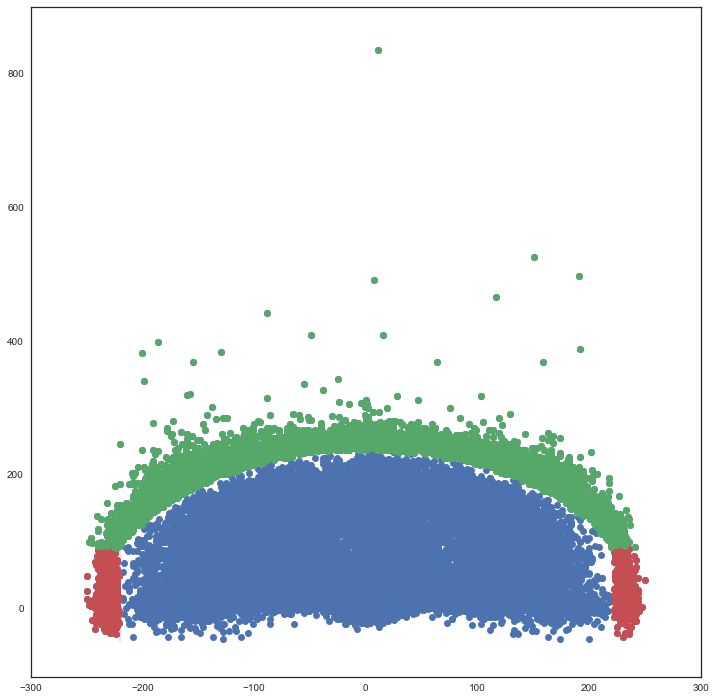

In [356]:
import numpy as np
def is_corner_3(r):
     return ((r.y < 92.5) and (abs(r.x) >= 220))
    
def is_normal_3(r):
    radius = 475/2.
    y_3pt = np.sqrt(np.square(radius) - np.square(r.x))
    return (r.y > max(92.5,y_3pt))

df['corner_3'] = df.apply(is_corner_3,axis = 1)
df['normal_3'] = df.apply(is_normal_3,axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111)
corner_three_a = Rectangle((-220, -47.5), 0, 140, color = 'red')
ax.plot(df.x, df.y, 'bo')
ax.plot(df.query('corner_3 == True').x, df.query('corner_3 == True').y, 'ro')
ax.plot(df.query('normal_3 == True').x, df.query('normal_3 == True').y, 'go')
ax.add_patch(corner_three_a)
# plt.xlim(-300,300)
# plt.ylim(0,800)

# Expected value

In [266]:
from pyspark.sql.types import FloatType, DateType, IntegerType, StringType
from pyspark.sql.functions import udf, sum, mean
import numpy as np

In [267]:
df = spark.read.option('header','true').csv('data/shot_charts_top_10/top_10_shot_charts_2011_2016.csv')
df.dtypes

[('_c0', 'string'),
 ('yr', 'string'),
 ('name', 'string'),
 ('team_name', 'string'),
 ('game_date', 'string'),
 ('season', 'string'),
 ('espn_player_id', 'string'),
 ('team_id', 'string'),
 ('espn_game_id', 'string'),
 ('period', 'string'),
 ('minutes_remaining', 'string'),
 ('seconds_remaining', 'string'),
 ('shot_made_flag', 'string'),
 ('action_type', 'string'),
 ('shot_type', 'string'),
 ('shot_distance', 'string'),
 ('opponent', 'string'),
 ('x', 'string'),
 ('y', 'string'),
 ('dribbles', 'string'),
 ('touch_time', 'string'),
 ('defender_name', 'string'),
 ('defender_distance', 'string'),
 ('shot_clock', 'string')]

In [272]:
dtype_dict = {'name' : StringType,
              'team_name' : StringType,
              'game_date' : StringType,
              'season' : StringType,
              'espn_player_id' : StringType,
              'team_id' : StringType,
              'espn_game_id' : StringType,
              'opponent' : StringType}
df2 = df.fillna('0')

for c in df.schema.names[:]:
    dtype = IntegerType if c not in dtype_dict.keys() else dtype_dict[c]
    print c,dtype
    df2 = df2.withColumn(c,df2[c].cast(dtype()))


_c0 <class 'pyspark.sql.types.IntegerType'>
yr <class 'pyspark.sql.types.IntegerType'>
name <class 'pyspark.sql.types.StringType'>
team_name <class 'pyspark.sql.types.StringType'>
game_date <class 'pyspark.sql.types.StringType'>
season <class 'pyspark.sql.types.StringType'>
espn_player_id <class 'pyspark.sql.types.StringType'>
team_id <class 'pyspark.sql.types.StringType'>
espn_game_id <class 'pyspark.sql.types.StringType'>
period <class 'pyspark.sql.types.IntegerType'>
minutes_remaining <class 'pyspark.sql.types.IntegerType'>
seconds_remaining <class 'pyspark.sql.types.IntegerType'>
shot_made_flag <class 'pyspark.sql.types.IntegerType'>
action_type <class 'pyspark.sql.types.IntegerType'>
shot_type <class 'pyspark.sql.types.IntegerType'>
shot_distance <class 'pyspark.sql.types.IntegerType'>
opponent <class 'pyspark.sql.types.StringType'>
x <class 'pyspark.sql.types.IntegerType'>
y <class 'pyspark.sql.types.IntegerType'>
dribbles <class 'pyspark.sql.types.IntegerType'>
touch_time <class

In [277]:
df2.select('shot_made_flag').take(5)

[Row(shot_made_flag=1),
 Row(shot_made_flag=1),
 Row(shot_made_flag=0),
 Row(shot_made_flag=1),
 Row(shot_made_flag=1)]

In [278]:
fgp = df2.groupBy('shot_distance')\
         .agg(mean(df2.shot_made_flag).alias('fgp'))\
         .orderBy('shot_distance', ascending = True)\
         .toPandas()

(0, 30)

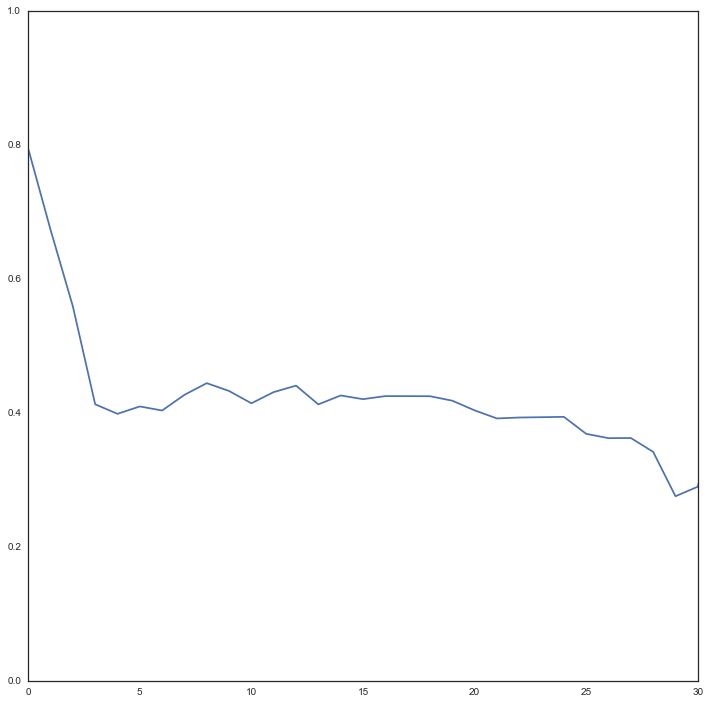

In [281]:
_df = fgp
plt.plot(_df.shot_distance,_df.fgp)
plt.xlim(0,30)

In [287]:
sqlContext.registerDataFrameAsTable(df2,'shot_data')

In [301]:
# r = df2.toPandas()
r.columns


Index([u'_c0', u'yr', u'name', u'team_name', u'game_date', u'season',
       u'espn_player_id', u'team_id', u'espn_game_id', u'period',
       u'minutes_remaining', u'seconds_remaining', u'shot_made_flag',
       u'action_type', u'shot_type', u'shot_distance', u'opponent', u'x', u'y',
       u'dribbles', u'touch_time', u'defender_name', u'defender_distance',
       u'shot_clock'],
      dtype='object')

In [ ]:
r.

In [288]:
sqlContext.sql('''
SELECT 
FROM shot_data
''')

DataFrame[_c0: int, yr: int, name: string, team_name: string, game_date: string, season: string, espn_player_id: string, team_id: string, espn_game_id: string, period: int, minutes_remaining: int, seconds_remaining: int, shot_made_flag: int, action_type: int, shot_type: int, shot_distance: int, opponent: string, x: int, y: int, dribbles: int, touch_time: int, defender_name: int, defender_distance: int, shot_clock: int]